In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
# 随机生成1000个点，围绕在 “y = 0.1x + 0.3” 的直线周围
num_points = 1000
vectors_set = []
for i in range(num_points):
    x1 = np.random.normal(0.0, 0.55)
    y1 = x1 * 0.1 + 0.3 + np.random.normal(0.0, 0.03)
    vectors_set.append([x1, y1])

In [4]:
# 生成一些样本
x_data = [v[0] for v in vectors_set]
y_data = [v[1] for v in vectors_set]

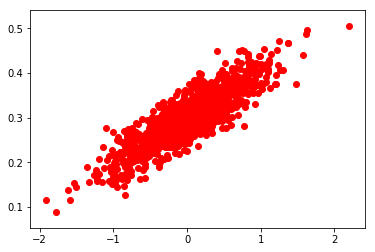

In [9]:
plt.scatter(x_data, y_data, c='r')
plt.show()

In [10]:
# 生成1维的W矩阵，取值是[-1,1]之间的随机数
W = tf.Variable(tf.random_uniform([1], -1.0, 1.0), name='W')
# 生成1维的b矩阵，初始值是0
b = tf.Variable(tf.zeros([1], name='b'))
# 经过计算得出预估值
y = W * x_data + b 

# 以预估值y和实际值y_data之间的均方误差作为损失
loss = tf.reduce_mean(tf.square(y - y_data), name='loss')

# 采用梯度下降算法来优化误差值
optimizer = tf.train.GradientDescentOptimizer(0.5) # 设置学习率

# 训练过程就是最小化这个误差值
train = optimizer.minimize(loss, name='train')

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

# 初始化的 W 和 b 值是多少？
print("W:",sess.run(W), "b =", sess.run(b), "loss = ", sess.run(loss))

# 执行20次训练
for step in range(20):
    sess.run(train)
    # 输出训练好的 W和b
    print("W:",sess.run(W), "b =", sess.run(b), "loss = ", sess.run(loss))

W: [ 0.67361069] b = [ 0.] loss =  0.187065
W: [ 0.50291556] b = [ 0.29476115] loss =  0.0498525
W: [ 0.38132283] b = [ 0.29624134] loss =  0.024752
W: [ 0.29651558] b = [ 0.29729575] loss =  0.0125414
W: [ 0.23736489] b = [ 0.29803118] loss =  0.00660136
W: [ 0.19610894] b = [ 0.29854411] loss =  0.00371172
W: [ 0.16733406] b = [ 0.29890186] loss =  0.00230601
W: [ 0.14726439] b = [ 0.29915139] loss =  0.00162218
W: [ 0.13326636] b = [ 0.29932544] loss =  0.00128951
W: [ 0.12350312] b = [ 0.29944682] loss =  0.00112768
W: [ 0.11669353] b = [ 0.29953146] loss =  0.00104896
W: [ 0.11194403] b = [ 0.29959053] loss =  0.00101066
W: [ 0.10863139] b = [ 0.29963171] loss =  0.000992033
W: [ 0.10632093] b = [ 0.29966044] loss =  0.00098297
W: [ 0.10470943] b = [ 0.29968047] loss =  0.000978561
W: [ 0.10358546] b = [ 0.29969445] loss =  0.000976416
W: [ 0.10280152] b = [ 0.29970419] loss =  0.000975373
W: [ 0.10225475] b = [ 0.29971099] loss =  0.000974865
W: [ 0.10187339] b = [ 0.29971573] lo

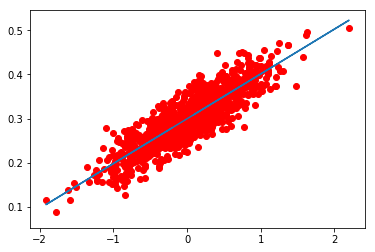

In [11]:
plt.scatter(x_data,y_data,c='r')
plt.plot(x_data,sess.run(W)*x_data + sess.run(b))
plt.show()